**Introduction**

*   [Computer Overview](https://www.youtube.com/watch?v=5GdGs5rnfvY)
*   [Google Colab Overview](https://sunju.org/teach/DL-Spring-2020/ColabNumPySciPy.html)
*   [User Interface Overview](https://phoenixnap.com/kb/cli-vs-gui)
*   [Bioinformatics Format Files](https://medium.com/@gearthdexter/bioinformatics-file-formats-3919a26b7679)



**WORKFLOW**
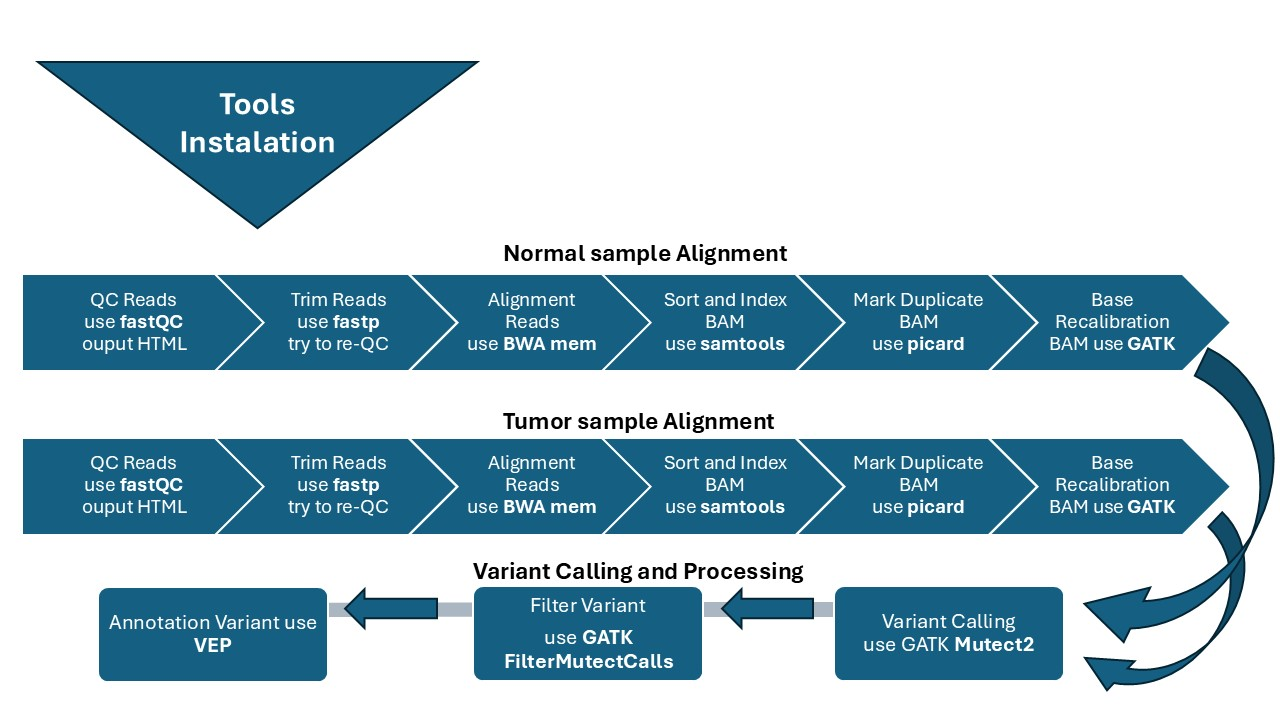

**1. Tools Instalation**

In [ ]:
#1.1
# Mount Google Drive to access tools and data folders
# This allows persistent storage across Colab sessions
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#1.2
# Define directories for tools and data within Google Drive
tools_dir = "/content/drive/MyDrive/ngs_practice/Tools"
data_dir = "/content/drive/MyDrive/ngs_practice/Data"

In [ ]:
#1.3
# Download FastQC zip file to tools directory
!wget -O "{tools_dir}/fastqc.zip" https://www.bioinformatics.babraham.ac.uk/projects/fastqc/fastqc_v0.11.9.zip

# Unzip the downloaded FastQC package
!unzip "{tools_dir}/fastqc.zip" -d "{tools_dir}"

# Make the FastQC script executable
!chmod +x "{tools_dir}/FastQC/fastqc"

# Verify FastQC installation by displaying help message
!"{tools_dir}/FastQC/fastqc" -help

In [ ]:
#1.4
# Create a directory for fastp tool
!mkdir "{tools_dir}/fastp"

# Download the fastp binary into the created directory
!wget -O "{tools_dir}/fastp/fastp" http://opengene.org/fastp/fastp

# Make fastp executable
!chmod a+x "{tools_dir}/fastp/fastp"

# Run fastp to verify it's installed correctly
!"{tools_dir}/fastp/fastp"

In [ ]:
#1.5
# Download and extract BWA toolkit using tar directly
!wget -O - "http://sourceforge.net/projects/bio-bwa/files/bwakit/bwakit-0.7.12_x64-linux.tar.bz2/download" | tar -xj -C "{tools_dir}"

# Run BWA wrapper script to verify installation
!"{tools_dir}/bwa.kit/run-bwamem"

In [ ]:
#1.6
# Download the latest version of Samtools source code
!wget -O "{tools_dir}/samtools-new.tar.bz2" https://github.com/samtools/samtools/releases/download/1.22/samtools-1.22.tar.bz2

# Extract the Samtools archive
!tar -xvjf "{tools_dir}/samtools-new.tar.bz2" -C "{tools_dir}"

# Change directory to Samtools source
%cd "{tools_dir}/samtools-1.22"

# Configure the Samtools build with install path
!./configure --prefix="{tools_dir}/samtools-1.22"

# Compile Samtools
!make

# Install the compiled binaries
!make install

# Return to home directory
%cd

# Run Samtools to confirm installation
!"{tools_dir}/samtools-1.22/bin/samtools"

In [ ]:
#1.7
# Download the latest version of bcftools source code
!wget -O "{tools_dir}/bcftools-new.tar.bz2" https://github.com/samtools/bcftools/releases/download/1.22/bcftools-1.22.tar.bz2

# Extract the bcftools archive
!tar -xvjf "{tools_dir}/bcftools-new.tar.bz2" -C "{tools_dir}"

# Change directory to bcftools source
%cd "{tools_dir}/bcftools-1.22"

# Configure the Samtools build with install path
!./configure --prefix="{tools_dir}/bcftools-1.22"

# Compile Samtools
!make

# Install the compiled binaries
!make install

# Return to home directory
%cd

# Run Samtools to confirm installation
!"{tools_dir}/bcftools-1.22/bin/bcftools"

In [ ]:
#1.8
# Update system package lists
!apt-get update

# Install Java 17, required for Picard and GATK
!apt-get install openjdk-17-jdk -y

# Set environment variables for Java
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

# Verify Java installation
!java -version

In [ ]:
#1.9
# Download Picard jar file
!wget -O "{tools_dir}/picard.jar" https://github.com/broadinstitute/picard/releases/download/3.4.0/picard.jar

# Make Picard jar executable (optional)
!chmod +x "{tools_dir}/picard.jar"

# Run Picard to verify
!java -jar "{tools_dir}/picard.jar"

In [ ]:
#1.10
# Download and unzip GATK package
!wget -O "{tools_dir}/gatk.zip" https://github.com/broadinstitute/gatk/releases/download/4.5.0.0/gatk-4.5.0.0.zip
!unzip "{tools_dir}/gatk.zip" -d "{tools_dir}"

# Make GATK script executable
!chmod +x "{tools_dir}/gatk-4.5.0.0/gatk"

# List GATK tools to verify
!"{tools_dir}/gatk-4.5.0.0/gatk" --list

**2. Normal Alignement**

In [ ]:
#2.1
# Run FastQC on paired-end FASTQ files
!"{tools_dir}/FastQC/fastqc" \
"{data_dir}/sample/raw_normal_R1.fastq.gz" \
"{data_dir}/sample/raw_normal_R2.fastq.gz" \
-o "{data_dir}/outfile"

#-o        output directory

In [ ]:
#2.2
# Run fastp for quality trimming and filtering
!"{tools_dir}/fastp/fastp" \
-i "{data_dir}/sample/raw_normal_R1.fastq.gz" \
-I "{data_dir}/sample/raw_normal_R1.fastq.gz" \
-o "{data_dir}/sample/trimed_normal_R1.fastq.gz" \
-O "{data_dir}/sample/trimed_normal_R2.fastq.gz" \
-q 10 -u 30 -n 10 -l 50 -h \
"{data_dir}/outfile/report_fastp.html"

#-i        input of forward reads (R1 FASTQ file)
#-I        input of reverse reads (R2 FASTQ file)
#-o        trimmed output for forward reads
#-O        trimmed output for reverse reads
#-q 10     Quality filtering: trim bases with quality score < 10 from both ends of each read.
#-u 30     Per read quality filtering: discard a read if more than 30% of bases are low quality (quality score < 20).
#-n 10     Discard reads with more than 10 'N' bases (unknown bases).
#-l 50     Minimum required read length after trimming. Reads shorter than 50 bases will be discarded.
#-h        Generate an HTML report summarizing filtering and trimming results.

In [ ]:
#2.3
# Run FastQC on paired-end FASTQ files
!"{tools_dir}/FastQC/fastqc" \
"{data_dir}/sample/trimed_normal_R1.fastq.gz" \
"{data_dir}/sample/trimed_normal_R1.fastq.gz" \
-o "{data_dir}/outfile"

#-o        output directory

In [ ]:
#2.4
# Run BWA-MEM to align reads and output SAM file
!"{tools_dir}/bwa.kit/bwa" mem \
-t 2 \
-R '@RG\tID:C1TD1ACXX.7\tSM:sample_normal\tPL:ILLUMINA\tLB:lib_normal\tPU:C1TD1ACXX.7' \
"{data_dir}/ref/Homo_sapiens_assembly38.fasta" \
"{data_dir}/sample/trimed_normal_R1.fastq.gz" \
"{data_dir}/sample/trimed_normal_R1.fastq.gz" \
> "{data_dir}/outfile/normal.sam"

#The script runs the bwa mem aligner to map paired-end FASTQ reads (R1 and R2) to a reference genome (Homo_sapiens_assembly38.fasta).
#It uses -t 2 to speed up the process by running 2 threads.
#The -R option specifies detailed read group (@RG) information, which is important for downstream analyses like marking duplicates or joint variant calling.
#The output is redirected to a SAM file (normal.sam), which is a plain-text alignment format.

In [ ]:
#2.5
# Convert SAM to BAM using Samtools
!"{tools_dir}/samtools-1.22/bin/samtools" view \
-Shb \
-o "{data_dir}/outfile/normal-unsorted.bam" \
"{data_dir}/outfile/normal-unsorted.sam"

#The samtools view command is used to convert the SAM file into a binary BAM format (normal.bam).
#-S: indicates input is a SAM file.
#-h: includes the header in the output.
#-b: specifies BAM output format.
#This step improves file size and performance for downstream tools by compressing and indexing alignments.

In [ ]:
#2.6
# Sort the BAM file
!"{tools_dir}/samtools-1.22/bin/samtools" sort \
-o "{data_dir}/outfile/normal-sorted.bam"
"{data_dir}/outfile/normal-unsorted.bam"
# This command sorts the unsorted BAM file by genomic coordinates.
# -o: specifies the output path for the sorted BAM file.
# The input file is the previously generated unsorted BAM file.
# Sorting is required for many downstream tools such as duplicate marking and variant calling.

In [ ]:
#2.7
# Index the sorted BAM file
!"{tools_dir}/samtools-1.22/bin/samtools" index \
"{data_dir}/outfile/normal-sorted.bam"

# This command creates an index (.bai) for the sorted BAM file.
# The index enables fast random access to alignment data, which is required by most GATK tools.
# It is stored in the same directory as the BAM file with the extension `.bai`.

In [ ]:
#2.8
# Mark duplicates in the BAM file using Picard
!java -jar "{tools_dir}/picard.jar" MarkDuplicates \
INPUT="{data_dir}/outfile/normal-sorted.bam" \
METRICS_FILE="{data_dir}/outfile/normal-metrics.txt" \
OUTPUT="{data_dir}/outfile/normal-dedup.bam" \
CREATE_INDEX=true

# The Picard MarkDuplicates tool identifies and marks duplicate reads in the BAM file,
# typically arising from PCR amplification or optical duplicates.
# INPUT: the path to the sorted BAM file to process.
# METRICS_FILE: the output file where duplication statistics will be recorded.
# OUTPUT: the resulting BAM file with duplicates marked.
# CREATE_INDEX=true: automatically creates an index (.bai) file for the deduplicated BAM.
# This step is important before variant calling to avoid false positives from duplicate reads.

In [ ]:
#2.9
# Run GATK BaseRecalibrator to create BQSR table
!"{tools_dir}/gatk-4.5.0.0/gatk" BaseRecalibrator \
-R "{data_dir}/ref/Homo_sapiens_assembly38.fasta" \
-I "{data_dir}/outfile/normal-dedup.bam" \
--known-sites "{data_dir}/ref/Homo_sapiens_assembly38.known_indels.vcf.gz" \
-O "{data_dir}/outfile/normal.grp"

# This command uses GATK's BaseRecalibrator to generate a base quality score recalibration (BQSR) table.
# -R: the reference genome used during alignment.
# -I: the input BAM file with duplicates marked.
# --known-sites: known variant sites (e.g., dbSNP or known indels) used to detect systematic biases.
# -O: the output recalibration table (with extension .grp).
# This step prepares data to correct base quality scores based on machine learning analysis of known variant positions.

In [ ]:
#2.10
# Apply BQSR to BAM file
!"{tools_dir}/gatk-4.5.0.0/gatk" ApplyBQSR \
-R "{data_dir}/ref/Homo_sapiens_assembly38.fasta" \
-I "{data_dir}/outfile/normal-dedup.bam" \
--bqsr-recal-file "{data_dir}/outfile/normal.grp" \
-O "{data_dir}/outfile/normal-bqsr.bam"

# This command applies the recalibration from the BQSR table to the BAM file.
# -R: the same reference genome used earlier.
# -I: the same deduplicated BAM file used to generate the recalibration table.
# --bqsr-recal-file: the output of BaseRecalibrator (.grp file).
# -O: the recalibrated BAM file.
# This final recalibrated BAM has improved base quality scores, which enhances accuracy in downstream variant calling.

**3. Tumor Alignement**

In [ ]:
#3.1
# Run FastQC on paired-end FASTQ files

In [ ]:
#3.2
# Run fastp for quality trimming and filtering

In [ ]:
#3.3
# Run FastQC on paired-end FASTQ files

In [ ]:
#3.4
# Run BWA-MEM to align reads and output SAM file

In [ ]:
#3.5
# Convert SAM to BAM using Samtools

In [ ]:
#3.6
# Sort the BAM file

In [ ]:
#3.7
# Index the sorted BAM file

In [ ]:
#3.8
# Mark duplicates in the BAM file using Picard

In [ ]:
#3.9
# Run GATK BaseRecalibrator to create BQSR table

In [ ]:
#3.10
# Apply BQSR to BAM file

**4. Variant Calling and Processing**

In [ ]:
#4.1
# Run GATK's Mutect2 to call somatic variants
!"{tools_dir}/gatk-4.5.0.0/gatk" Mutect2 \
-L chr17 \
-R "{data_dir}/ref/Homo_sapiens_assembly38.fasta" \
-I "{data_dir}/outfile/normal-bqsr.bam" \
-I "{data_dir}/outfile/tumor-bqsr.bam" \
-tumor sample_tumor \
-normal sample_normal \
-O "{data_dir}/outfile/somatic.vcf"

# This command runs GATK's Mutect2 to call somatic variants by comparing tumor and normal samples.
# -L chr17: restricts variant calling to chromosome 17 (can be removed or expanded for genome-wide calling).
# -R: path to the reference genome FASTA file used in earlier steps.
# -I: input BAM files after BQSR, for both tumor and normal samples.
# -tumor: specifies the sample name for the tumor BAM (must match @RG:SM).
# -normal: specifies the sample name for the matched normal BAM (must match @RG:SM).
# -O: path to the output VCF file containing detected somatic variants.
# Mutect2 uses a probabilistic model to distinguish real somatic mutations from sequencing errors and germline variants.

In [ ]:
#4.2
!"{tools_dir}/gatk-4.5.0.0/gatk" FilterMutectCalls \
-V "{data_dir}/outfile/somatic.vcf" \
-R "{data_dir}/ref/Homo_sapiens_assembly38.fasta" \
-O "{data_dir}/outfile/somatic_add-filter-value.vcf"

# This command filters the raw somatic variants generated by Mutect2.
# -V: the input VCF file containing unfiltered somatic variants from Mutect2.
# -R: the same reference genome used in alignment and variant calling.
# -O: the output VCF file that contains only the filtered, high-confidence somatic variants.
# FilterMutectCalls applies a probabilistic model and various quality filters to reduce false positives
# based on read orientation bias, strand bias, mapping quality, and other artifacts.

In [ ]:
#4.3
!"{tools_dir}/bcftools-1.22/bin/bcftools" view \
-f PASS \
-o somatic-pass-only.vcf \
-O v somatic_add-filter-value.vcf

#bcftools view: invokes the tool for viewing/filtering VCF/BCF files.
#-f PASS: includes only records where the FILTER field is PASS.
#-o output_filtered.vcf: sets the output filename.
#-O v: specifies output format as VCF (v = VCF, b = BCF, z = compressed VCF).
#somatic_add-filter-value.vcf: your original VCF file (e.g., somatic-filter.vcf).

In [ ]:
#Upload vcf files to Variant Effect Predictor (VEP) and Visualized in Integrated Genome Viewer (IGV)

Used Tools Documentation

*   [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/) (Babraham Bioinformatics group, 2023)
*   [Fastp](https://github.com/OpenGene/fastp) (Chen, S., 2018) https://doi.org/10.1093/bioinformatics/bty560
*   [BWA-MEM](https://github.com/lh3/bwa) (Li, H., & Durbin, R., 2009) https://doi.org/10.1093/bioinformatics/btp324
*   [SAMtools](https://www.htslib.org/doc/samtools.html) (Li, et.al., 2009) https://doi.org/10.1093/bioinformatics/btp352
*   [BCFtools](https://www.htslib.org/doc/bcftools.html) Li, et.al., 2009) https://doi.org/10.1093/bioinformatics/btp352
*   [Picard](https://broadinstitute.github.io/picard/) (Broad Institute, 2019)
*   [GATK](https://gatk.broadinstitute.org/hc/en-us) (Van der Auwera GA & O'Connor BD, 2020) ~ Book
*   [VEP](https://asia.ensembl.org/info/docs/tools/vep/index.html) (McLaren, et al., 2016) https://doi.org/10.1186/s13059-016-0974-4

This script was created to support the NGS practical training for MIB FKKMK UGM 2024


📩 Need Help? Contact Me!

If you have any questions or run into issues, feel free to reach out:

📧 Email: alimelhakim@gmail.com

🐙 GitHub: https://github.com/alimelhakim/WES_in_google-colab.git

📄 LinkedIn: Alim El Hakim